## Lecture Note

In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

In [21]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_us = df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')].copy()
df_us = df_us.dropna(subset=['salary_year_avg'])
job_list = [df_us[df_us['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]
job_list[0]

109        89000.0
180        90250.0
410       133285.0
988        62623.0
1413       71300.0
            ...   
782637     70000.0
782798    111175.0
783588    125000.0
783866    115000.0
784882     87500.0
Name: salary_year_avg, Length: 4350, dtype: float64

<Axes: >

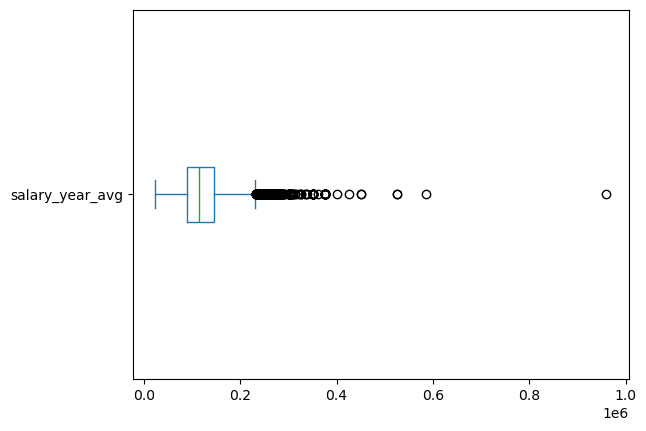

In [15]:
df_da_us['salary_year_avg'].plot(kind='box', vert=False)

In [1]:

plt.boxplot(job_list, labels = job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.xlim(0, 600000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()

NameError: name 'plt' is not defined

## Homework

Text(0.5, 1.0, 'Distribution of Data Scientist Salary')

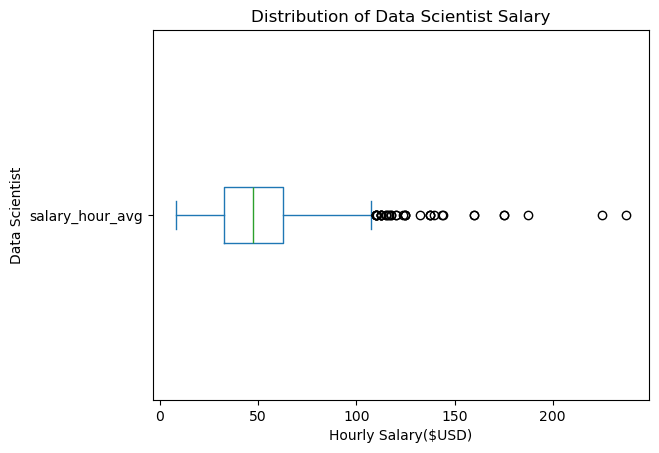

In [28]:
df_ds = df[df['job_title_short']=='Data Scientist'].copy()
df_ds['salary_hour_avg'].plot(kind='box',vert=False)
plt.ylabel('Data Scientist')
plt.xlabel('Hourly Salary($USD)')
plt.title('Distribution of Data Scientist Salary')

C:\Users\Thomas\AppData\Local\Temp\ipykernel_27380\524959591.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df_plot, labels = countries,vert=False)


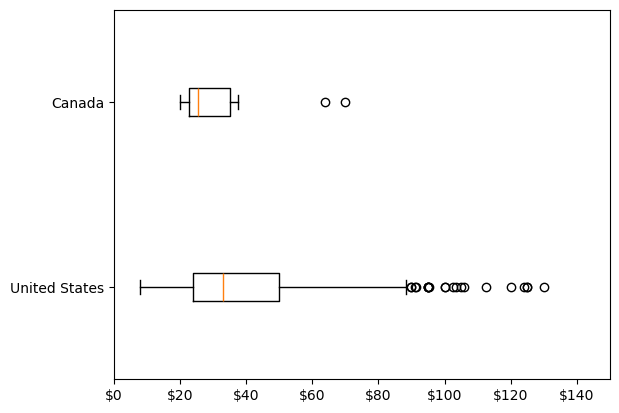

In [77]:
countries = ['United States', 'Canada']
df_da_na = df[df['job_country'].isin(countries)].copy()
df_da_na = df_da_na[df_da_na['job_title_short']=='Data Analyst']
df_da_na = df_da_na.dropna(subset=['salary_hour_avg'])

df_plot = [df_da_na[df_da_na['job_country'] == country]['salary_hour_avg'] for country in countries]

plt.boxplot(df_plot, labels = countries,vert=False)
plt.xlim(0, 150)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x)}'))


result_list = [df[df['group_column'] == group_value][target_column] for group_value in list_of_groups]
这种列表推导的“固定格式”就是：
遍历组名列表，每次筛选出该组对应的子集，然后提取目标列，最后组成一个列表或字典。

group_column：你要分组筛选的列（这里是 'job_country'）
list_of_groups：你想按哪些组分割（这里是 countries 列表）
target_column：你想分析、绘图的列（这里是 'salary_year_avg'）

C:\Users\Thomas\AppData\Local\Temp\ipykernel_27380\3436608231.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df_plot, labels=job_titles, vert=False)


Text(0.5, 1.0, 'Comparison of Hourly Salaries for Data Roles in Canada')

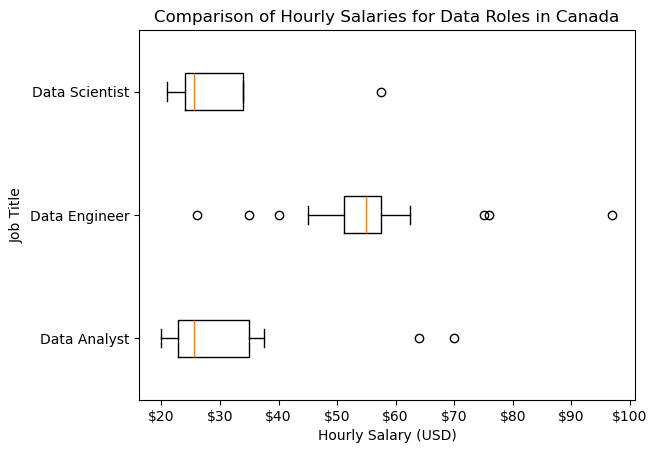

In [95]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_canada = df[df['job_country']=='Canada'].copy()
df_canada = df_canada.dropna(subset='salary_hour_avg')
df_plot = [df_canada[df_canada['job_title_short']==job]['salary_hour_avg'] for job in job_titles]
plt.boxplot(df_plot, labels=job_titles, vert=False)
plt.ylabel('Job Title')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x)}'))
plt.xlabel('Hourly Salary (USD)')
plt.title("Comparison of Hourly Salaries for Data Roles in Canada")